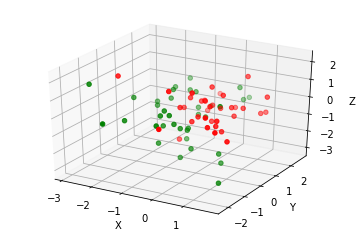

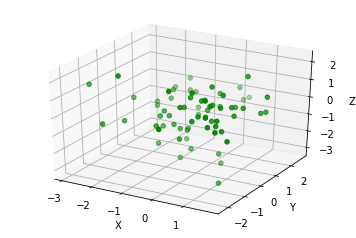

[]
0.5


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import PIL.Image as Image
from numpy import random,mat
from mpl_toolkits.mplot3d import Axes3D

#標準化
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

#pca
def pca(XMat, k):
    m, n = np.shape(XMat)                          # 返回维度 m*n，m為照片總數
    average = np.mean(XMat, axis=0)                # 返回列的平均值。
    #data_adjust = XMat - average                  # 對數據進行中心化處理
    data_adjust = standardization(XMat)            # 對數據進行標準化化處理
    #print(data_adjust.shape)

    covX = np.cov(data_adjust.T)                   # 得到協方差矩陣
                                                   
    eigenValue, eigenVec = np.linalg.eig(covX)     # 取特徵值和特徵向量
                                                   
    if k > n:
        print('k must be lower than feature number') 
        return
    else:
        selectVec = eigenVec[:, :k]                # 選取K個特徵向量，建立投影矩陣
        finalData = np.dot(data_adjust, selectVec) # 投影
        finalData = standardization(finalData)     # 對數據進行標準化化處理
    return finalData

#壓縮圖片
def compressImage(srcPath,dstPath):
    for filename in os.listdir(srcPath):           
        if not os.path.exists(dstPath):
                os.makedirs(dstPath)

        #完整的檔案或資料夾路徑
        srcFile=os.path.join(srcPath,filename)
        dstFile=os.path.join(dstPath,filename)

        # 如果是檔案就處理
        if os.path.isfile(srcFile):
            
             if os.path.isfile(srcFile):
                try:
                    sImg=Image.open(srcFile)
                    dImg=sImg.resize((1,1),Image.ANTIALIAS)  # 設定壓縮尺寸
                    dImg.save(dstFile)
                except Exception:
                    print(dstFile+"fail")

        # 如果是資料夾就遞迴
        if os.path.isdir(srcFile):
            compressImage(srcFile, dstFile)

np.random.seed()   

#kmeans
def kmeans_xufive(ds, k): 
    m, n = ds.shape                                          # m：樣本數量，n：每個樣本的屬性值個數 
    result = np.empty(m, dtype=np.int)                       # m個樣本的分類結果 
    cores = np.empty((k, n))                                 # k個質心 
    cores = ds[np.random.choice(np.arange(m), k, replace=False)]      # 隨機從72個樣本點生成質心
    #print(cores)
    #cores = [
    #    [np.random.randint(-3,1),np.random.randint(-2,2),np.random.randint(-3,2)]
    #    for i in range(2)
    #]                                                        # 隨機生成質心
    
    while True: # 迭代計算 
        d = np.square(np.repeat(ds, k, axis=0).reshape(m, k, n) - cores) 
        distance = np.sqrt(np.sum(d, axis=2))                # 計算每個樣本距離k個質心的距離
        index_min = np.argmin(distance, axis=1)              # 標記每個樣本距離最近的質心
        
        if (index_min == result).all():                      # 如果樣本分類沒有改變 
            return result, cores                             # 則回傳分類結果和質心資料
        
        result[:] = index_min                                # 重新分類 
        for i in range(k):  
            items = ds[result==i]                            # 找出對應當前質心的分類樣本
            if len(items) != 0:
                cores[i] = np.mean(items, axis=0)            # 取分類樣本座標平均值作為新質心的位置 
                
compressImage("./sum/green/","./sum/green_compression/")     # 壓縮綠色芒果圖片
path='./sum/green_compression/'
files=os.listdir(path)
img_list = []

#讀檔
for file in files:
    
    p=path+file
    img = cv2.imread(p)
    img_2D = np.reshape(img,(-1,3))
    img_1D = np.reshape(img,(-1,1))                          # 將原先三維的數值展開成一維
    img_1D = img_1D.flatten()
    img_list.append(img_1D)
        
compressImage("./sum/red/","./sum/red_compression/")         # 壓縮紅色芒果圖片
path='./sum/red_compression/'
files=os.listdir(path)

for file in files:
    
    p=path+file
    img = cv2.imread(p)
    img_2D = np.reshape(img,(-1,3))
    img_1D = np.reshape(img,(-1,1))
    img_1D = img_1D.flatten()
    img_list.append(img_1D)

img_mat= np.mat(img_list)                                    # list轉成矩陣

XMat = np.array(img_mat,dtype = 'float16').astype(np.float)
k = 3
finalData = pca(XMat, k)                                     #執行PCA，每張照片三個特徵向量
total_train = []
total_train = finalData.tolist()

#畫圖
xx=[]
yy=[]
zz=[]
for i in range(36,72):
    xx.append(np.real(total_train[i][0]))
    yy.append(np.real(total_train[i][1]))
    zz.append(np.real(total_train[i][2]))

xxx=[]
yyy=[]
zzz=[]
for i in range(36):
    xxx.append(np.real(total_train[i][0]))
    yyy.append(np.real(total_train[i][1]))
    zzz.append(np.real(total_train[i][2]))
   
# x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  

ax.scatter(xx, yy, zz, c='r')
ax.scatter(xxx, yyy, zzz, c='g')

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

total_train_mat = np.array(total_train)                     #array轉成矩陣
result,cores = kmeans_xufive(total_train_mat, 2)            #做kmeans分成兩類

class1 = []
class2 = []

for i in range(len(result)):                                #將各點對應座標放進class
    if result[i] == 1:
        class1 = np.append(class1,total_train[i])
    else:
        class2 = np.append(class2,total_train[i])

#畫圖
class1 = np.reshape(class1,(-1,3))
class2 = np.reshape(class2,(-1,3))
rxx=[]
ryy=[]
rzz=[]
for i in class1:
    rxx.append(np.real(i[0]))
    ryy.append(np.real(i[1]))
    rzz.append(np.real(i[2]))

rxxx=[]
ryyy=[]
rzzz=[]
for i in class2:
    rxxx.append(np.real(i[0]))
    ryyy.append(np.real(i[1]))
    rzzz.append(np.real(i[2]))
ax = plt.subplot(111, projection='3d') 

ax.scatter(rxx, ryy, rzz, c='g')
ax.scatter(rxxx, ryyy, rzzz, c='r')

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

#算accuracy
pred=[]
print(pred)
pred=np.array(pred)
correct=0
error=0
ans = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
for i in range(72):
    if ans[i]==result[i]:
        correct+=1
    if ans[i]!=result[i]:
        error+=1
accuracy=correct/72
print(accuracy)
result = pd.DataFrame(result)
result = result.to_csv("0610832_result.csv")